In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
road_accidents=pd.read_csv('road-accidents.csv',comment='#',sep='|')
road_accidents.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [3]:
miles_driven=pd.read_csv('miles-driven.csv',sep='|',comment='#')
miles_driven.head(10)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784
5,Colorado,46606
6,Connecticut,31197
7,Delaware,9028
8,District of Columbia,3568
9,Florida,191855


In [9]:
df=pd.concat([road_accidents,miles_driven['million_miles_annually']],axis=1)
df.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784
5,Colorado,13.6,37,28,95,46606
6,Connecticut,10.8,46,36,82,31197
7,Delaware,16.2,38,30,99,9028
8,District of Columbia,5.9,34,27,100,3568
9,Florida,17.9,21,29,94,191855


In [10]:
df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
count,51.000000,51.000000,51.000000,51.00000,51.000000
mean,15.790196,31.725490,30.686275,88.72549,57851.019608
std,4.122002,9.633438,5.132213,6.96011,59898.414088
min,5.900000,13.000000,16.000000,76.00000,3568.000000
25%,12.750000,23.000000,28.000000,83.50000,17450.000000
50%,15.600000,34.000000,30.000000,88.00000,46606.000000
75%,18.500000,38.000000,33.000000,95.00000,71922.500000
max,23.900000,54.000000,44.000000,100.00000,320784.000000


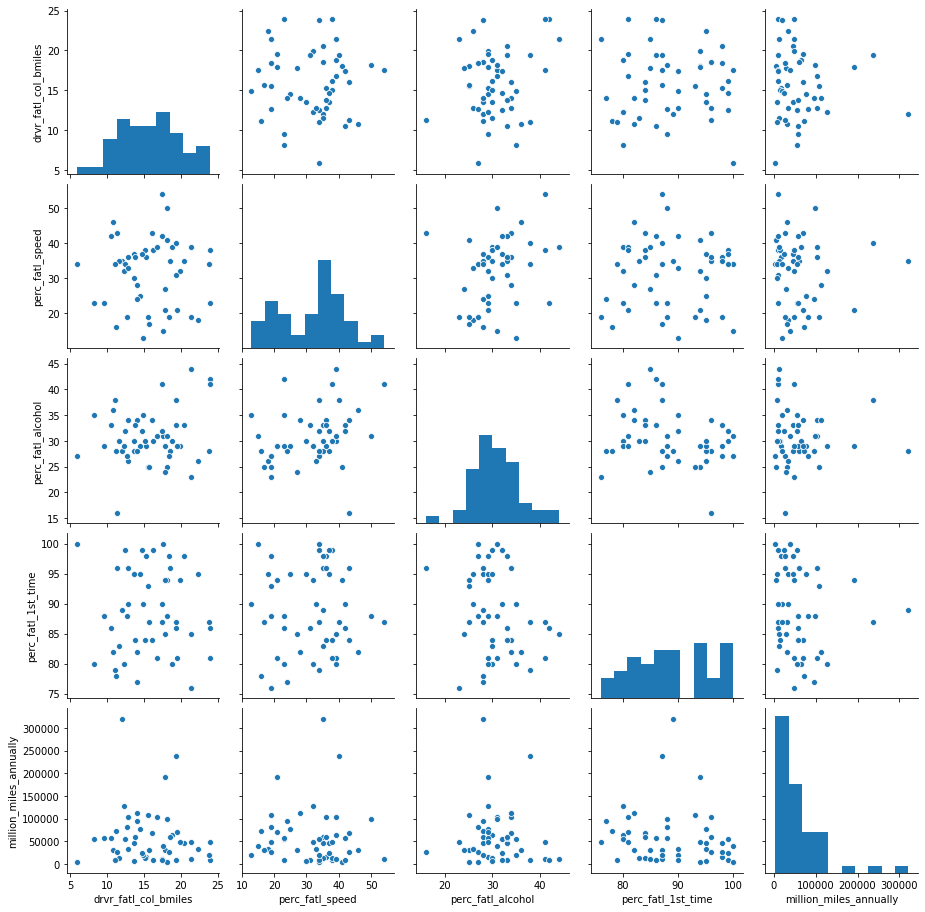

In [11]:

sns.pairplot(df,diag_kind='hist')

In [12]:
corr=df.corr(method='pearson')
corr

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000


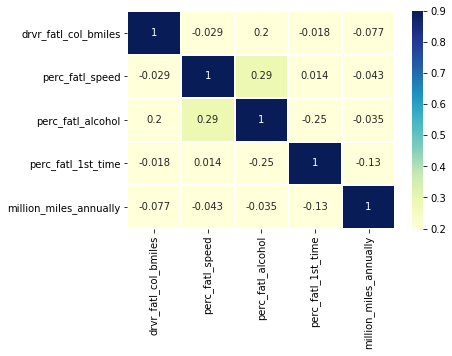

In [13]:
sns.heatmap(corr,xticklabels=corr.columns,
           yticklabels=corr.columns,
           cmap='YlGnBu',
           annot=True,
           linewidth=1.0,vmin=0.2,vmax=0.9)

In [14]:
df.columns

Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time', 'million_miles_annually'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time']],df['drvr_fatl_col_bmiles'],test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred=lin_reg.predict(X_test)
y_pred

array([15.73925232, 16.12193976, 15.80236078, 16.05287496, 15.40292435,
       15.75123639, 15.86813342, 15.78319857, 17.16238394, 15.45941962,
       15.6905138 ])

In [20]:
from sklearn.preprocessing import LabelEncoder
df['state']=LabelEncoder().fit_transform(df['state'])


In [28]:
from sklearn.preprocessing import MinMaxScaler
x=df[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time','drvr_fatl_col_bmiles']].values
sc=MinMaxScaler()
df1=sc.fit_transform(x)

In [35]:
df1

array([[0.63414634, 0.5       , 0.16666667, 0.71666667],
       [0.68292683, 0.32142857, 0.75      , 0.67777778],
       [0.53658537, 0.42857143, 0.83333333, 0.70555556],
       [0.12195122, 0.35714286, 0.79166667, 0.91666667],
       [0.53658537, 0.42857143, 0.54166667, 0.33888889],
       [0.58536585, 0.42857143, 0.79166667, 0.42777778],
       [0.80487805, 0.71428571, 0.25      , 0.27222222],
       [0.6097561 , 0.5       , 0.95833333, 0.57222222],
       [0.51219512, 0.39285714, 1.        , 0.        ],
       [0.19512195, 0.46428571, 0.75      , 0.66666667],
       [0.14634146, 0.32142857, 0.70833333, 0.53888889],
       [1.        , 0.89285714, 0.45833333, 0.64444444],
       [0.56097561, 0.46428571, 0.91666667, 0.52222222],
       [0.56097561, 0.64285714, 0.83333333, 0.38333333],
       [0.29268293, 0.46428571, 0.79166667, 0.47777778],
       [0.09756098, 0.32142857, 0.45833333, 0.54444444],
       [0.34146341, 0.28571429, 0.375     , 0.66111111],
       [0.14634146, 0.25      ,

In [42]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df1)

In [43]:
pca.components_

array([[-0.06614966, -0.26046749,  0.95887508, -0.09132077],
       [ 0.88412361,  0.3804275 ,  0.18337304,  0.19993671]])

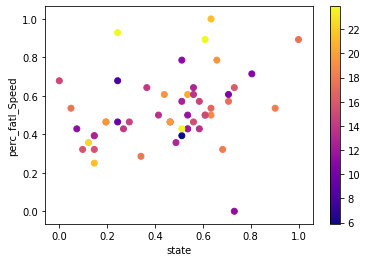

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df1[:,0], df1[:,1] , c=df['drvr_fatl_col_bmiles'] ,cmap ='plasma')
plt.xlabel('state')
plt.ylabel('perc_fatl_Speed')
plt.colorbar()

In [47]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [48]:
print(kmeans.cluster_centers_)

[[0.64939024 0.671875   0.36979167 0.66840278]
 [0.44134727 0.43877551 0.82738095 0.52989418]
 [0.25958188 0.48469388 0.26785714 0.44285714]]


In [53]:
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 2, 0, 0, 0, 0])

In [56]:
y_kmeans=kmeans.predict(df1)

In [58]:
y_kmeans

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 2, 0, 0, 0, 0])

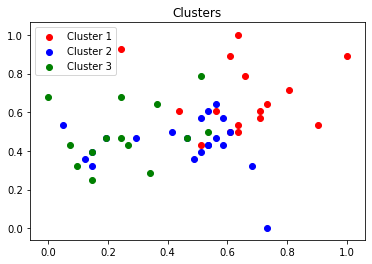

In [59]:
plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.title('Clusters')
plt.legend()
plt.show()

In [60]:
df['c']=kmeans.labels_

In [62]:
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,c
0,0,18.8,39,30,80,64914,0
1,1,18.1,41,25,94,4593,1
2,2,18.6,35,28,96,59575,1
3,3,22.4,18,26,95,32953,1
4,4,12.0,35,28,89,320784,1


In [63]:
df['number_of_accidents']=df['drvr_fatl_col_bmiles']*df['million_miles_annually']/1000

In [65]:
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,c,number_of_accidents
0,0,18.8,39,30,80,64914,0,1220.3832
1,1,18.1,41,25,94,4593,1,83.1333
2,2,18.6,35,28,96,59575,1,1108.0950
3,3,22.4,18,26,95,32953,1,738.1472
4,4,12.0,35,28,89,320784,1,3849.4080


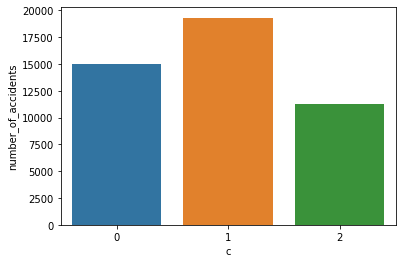

In [85]:
sns.barplot(df['c'],df['number_of_accidents'],ci=None,estimator=sum)

Which cluster do you think should be a focus for policy intervention and further investigation?

CLUSTER 1